In [2]:
import pandas as pd
import numpy as np
import re

# 1 Load Data and basic analysis

In [1]:
df = pd.read_excel('/Users/luyin/Desktop/project/Q&A.xlsx',header = 0)

In [7]:
df.head(3)

,Id,Company,Participants,Date,Event name,Event type,Analyst name,Analyst company,Question,Answer,Level 1,Level 2,Normal tag(s),FW / LOB,Breakout,Earnings tag(s)
0,1,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,"The performance in equities was great, and you...",There wasn’t anything particularly noteworthy ...,NIR,Markets,Equities,LOB,CIB,NaN
1,2,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,You and others have been talking with your pri...,"Yes, this is where it would be. I wouldn’t say...",NIR,Markets,Prime brokerage / ROA,LOB,CIB,NaN
2,3,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,In Jamie’s letter he talked about mentioning t...,"No, it is more of the same. Obviously, G-SIB t...",Regulatory Capital and Liquidity,GSIB,NaN,Firmwide,Capital,NaN


In [11]:
df.columns = ['id']+ list(df.columns[1:])
df.groupby('Event type').count()

,id,Company,Participants,Date,Event name,Analyst name,Analyst company,Question,Answer,Level 1,Level 2,Normal tag(s),FW / LOB,Breakout,Earnings tag(s)
Event type,,,,,,,,,,,,,,,
Conference,1403,1403,1403,1403,1403,1203,1203,1403,1403,1403,1403,1032,1403,1403,618
Earnings call,2823,2823,2823,2823,2823,2817,2817,2823,2823,2823,2823,2077,2823,2823,1140
Fixed income call,258,258,258,258,258,248,248,258,258,258,258,191,258,258,64
Investor Day,18,18,18,18,18,0,0,18,18,18,18,14,18,18,3
Investor day,49,49,49,49,49,40,40,49,49,49,49,40,49,49,30
Other,7,7,7,7,7,7,7,7,7,7,7,6,7,7,3


In [12]:
df.groupby('Analyst name').count()

,id,Company,Participants,Date,Event name,Event type,Analyst company,Question,Answer,Level 1,Level 2,Normal tag(s),FW / LOB,Breakout,Earnings tag(s)
Analyst name,,,,,,,,,,,,,,,
Adam Hurwich,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Alevizos Alevizakos,14,14,14,14,14,14,14,14,14,14,14,11,14,14,9
Andrew Lim,20,20,20,20,20,20,20,20,20,20,20,13,20,20,7
Arnold Kakuda,30,30,30,30,30,30,30,30,30,30,30,17,30,30,8
Bill Carcache,25,25,25,25,25,25,25,25,25,25,25,20,25,25,12
Brennan Hawken,114,114,114,114,114,114,114,114,114,114,114,88,114,114,34
Brian Foran,24,24,24,24,24,24,24,24,24,24,24,22,24,24,9
Brian Kleinhanzl,82,82,82,82,82,82,82,82,82,82,82,65,82,82,34
Brian Klock,19,19,19,19,19,19,19,19,19,19,19,12,19,19,6


,id,Company,Participants,Date,Event name,Analyst name,Analyst company,Question,Answer,Level 1,Level 2,Normal tag(s),FW / LOB,Breakout,Earnings tag(s)
Event type,,,,,,,,,,,,,,,
Conference,1403,1403,1403,1403,1403,1203,1203,1403,1403,1403,1403,1032,1403,1403,618
Earnings call,2823,2823,2823,2823,2823,2817,2817,2823,2823,2823,2823,2077,2823,2823,1140
Fixed income call,258,258,258,258,258,248,248,258,258,258,258,191,258,258,64
Investor Day,18,18,18,18,18,0,0,18,18,18,18,14,18,18,3
Investor day,49,49,49,49,49,40,40,49,49,49,49,40,49,49,30
Other,7,7,7,7,7,7,7,7,7,7,7,6,7,7,3


In [13]:
l = df['Analyst name'].unique() # 79 unique analyst

# 2. Tokenize questions by analyst name

In [15]:
dic = {} #create dictionary for questions

for name in l:
    list_ = list(df.loc[df['Analyst name']  == name]['Question'])
    dic[name] = list_

In [19]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

In [48]:
import spacy
import string
# Load English tokenizer, tagger, parser, NER and word vectors
from spacy.lang.en.stop_words import STOP_WORDS
# STOP_WORDS.add('\xa0')
# STOP_WORDS.add('and')
# STOP_WORDS.add('like')
# STOP_WORDS.add('\n')
# STOP_WORDS.add('think')
# STOP_WORDS.add("'s")
# STOP_WORDS.add(" ")
STOP_WORDS |= {'\xa0','and','like','\n', 'think', "'s", " ", "'re", '’s', '’m', "'m", "re",'ve', 'is'}
STOP_WORDS -= {'who','where','how', 'what', 'when', 'whenever'}

# STOP_WORDS.remove("whatever")
# STOP_WORDS.remove("what")
# STOP_WORDS.remove("when")
# STOP_WORDS.remove("where")
# STOP_WORDS.remove("how")

tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation
# tokens.ents stands for entity in the word
# https://spacy.io/usage/spacy-101#annotations-token
# lowercase and remove punctuation and stop words
def tokenize(sent):
    sent = re.sub('[^A-Za-z&]', ' ', sent) # replace non-letter with space
    sent = re.sub(r'\b[a-zA-Z]\b', '', sent) #remove single letter 
    tokens = tokenizer(sent)
    return [(token.text.lower()) for token in tokens if \
            (token.text.lower() not in punctuations \
             and token.text not in STOP_WORDS \
             and token.pos_ in ('PROPN', 'VERB', 'NOUN'))] # only keep PRONOUN, VERB and NOUN
# test
tokens = tokenize(" I'm 's what do you think or like and Apple is looking at buying U.K. startup for $1 billion")
for token in tokens:
    print (token)
    

what
apple
looking
buying
startup


In [49]:
from collections import Counter
max_vocab_size = 10

l = df['Analyst name'].unique() # 79 unique analyst
word_dic = {}
all_word_dic = {} # all tokens with analyst name
for name in l:
    token_dataset = []
    all_tokens = []
    for q in dic[name]:
        tokens = tokenize(q)
        token_dataset.append(tokens)
        all_tokens += tokens
        top10 = Counter(all_tokens).most_common(max_vocab_size)
        word_dic[name] = top10
        all_word_dic[name] = all_tokens
        
print(word_dic['Glenn Schorr'])

[('what', 89), ('quarter', 66), ('question', 49), ('growth', 48), ('year', 42), ('business', 39), ('lot', 35), ('want', 34), ('going', 30), ('is', 28)]


The performance in equities was great, and you mentioned it’s pretty much across the board. Do you think there’s any seasonality, any one-time events, block trades, anything like that, that would lift such good performance in the quarter?


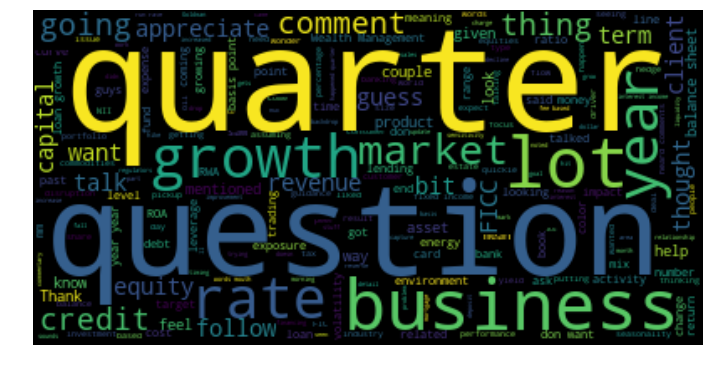

In [51]:
# Create and generate a word cloud image:
test1  = ' '.join(word for word in all_word_dic['Glenn Schorr'])
wordcloud = WordCloud().generate(test1)

print(dic['Glenn Schorr'][0])

# # Display the generated image:
# plt.figure(figsize=(12,8))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()
from PIL import Image

image = Image.open('/Users/luyin/Desktop/project/sample plot wordcloud.png')
display(image)

In [47]:
# # Create and generate a word cloud image:
# test2 = ''
# for question in dic['Glenn Schorr']:
#     test2 +=  question

# wordcloud = WordCloud().generate(test2)

# # Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [56]:
from nltk.util import ngrams
import collections
from nltk import word_tokenize
import nltk
import matplotlib
import re

In [59]:
def my_tokenize(sent):
    sent = re.sub('[^A-Za-z&]', ' ', sent)
    sent2 = " ".join(sent.split())
    tokens = word_tokenize(sent2)
    tokens = [x.lower() for x in tokens]
#     tokens2 = [w for w in tokens if not w in STOP_WORDS]
    return tokens2

In [89]:
def ngrams_(n_gram, analyst_name, top_n):
#     raw = " ".join(dic[analyst_name])
#     tokens = my_tokenize(raw)
    tokens = all_word_dic[analyst_name]# global dictionary with all tokens group by analyst name
    if len(tokens)>1:
        many_gram = ngrams(tokens, n_gram)
        freq = collections.Counter(many_gram)
        return freq.most_common(top_n)

In [90]:
ngrams_(2, 'Glenn Schorr', 10)

[(('wealth', 'management'), 16),
 (('balance', 'sheet'), 14),
 (('basis', 'points'), 11),
 (('don', 'want'), 11),
 (('loan', 'growth'), 10),
 (('year', 'year'), 9),
 (('fixed', 'income'), 7),
 (('heard', 'comments'), 7),
 (('happened', 'quarter'), 6),
 (('guess', 'question'), 6)]

In [61]:
def wordfreqviz(analyst_name, top_n):
    rslt = wordfreq(analyst_name, top_n)
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(analyst_name, top_n):
    raw = " ".join(dic[analyst_name])
    text = tokenize(raw)
    word_dist = nltk.FreqDist(text)
    rslt = pd.DataFrame(word_dist.most_common(top_n),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

In [64]:
dic_analyst = {}
for analyst in l:
    r = " ".join(dic[analyst])
    words = re.sub('[^A-Za-z&]', ' ', r) # replace none letters to space
    words = " ".join(words.split())
    dic_analyst[analyst] = words

In [65]:
dic_analyst_value = list(dic_analyst.values())
vectorizer2 = TfidfVectorizer(max_df = 0.70, strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
    ngram_range=(2,4), use_idf=1,smooth_idf=1,sublinear_tf=1,
    stop_words = 'english')
vec = vectorizer2.fit_transform(dic_analyst_value)

In [66]:
weights = np.asarray(vec.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vectorizer2.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
162491,little bit,0.009792
108887,going forward,0.006236
75491,don t,0.006053
147820,just wanted,0.005973
15255,balance sheet,0.005961
164876,loan growth,0.005855
172296,m just,0.005853
315954,u s,0.005748
111103,good morning,0.005611
328187,wealth management,0.005035


In [67]:
vec.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00764751, 0.00764751,
        0.00764751],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [68]:
wordfreq('Glenn Schorr', 4)

,Frequency
Word,
what,89
quarter,66
question,49
growth,48


In [95]:
from numpy import nan
dic_2_gram = {}
for analyst in l:
    if analyst is not nan: # incase there is a nan in the dictionary
        dic_2_gram[analyst] = ngrams_(2,analyst,5)

In [96]:
dic_2_gram

{'Glenn Schorr': [(('wealth', 'management'), 16),
  (('balance', 'sheet'), 14),
  (('basis', 'points'), 11),
  (('don', 'want'), 11),
  (('loan', 'growth'), 10)],
 'John McDonald': [(('interest', 'income'), 39),
  (('talk', 'bit'), 33),
  (('efficiency', 'ratio'), 27),
  (('loan', 'growth'), 20),
  (('investor', 'day'), 19)],
 'Erika Najarian': [(('balance', 'sheet'), 23),
  (('market', 'share'), 18),
  (('wells', 'fargo'), 14),
  (('follow', 'question'), 14),
  (('expense', 'management'), 13)],
 "Matthew O'Connor": [(('interest', 'income'), 29),
  (('point', 'view'), 28),
  (('balance', 'sheet'), 23),
  (('couple', 'years'), 20),
  (('loan', 'growth'), 20)],
 'Chris Spahr': [(('winners', 'consolidation'), 2),
  (('cet', 'ratio'), 1),
  (('ratio', 'guidance'), 1),
  (('guidance', 'do'), 1),
  (('do', 'kind'), 1)],
 'Gerard Cassidy': [(('can', 'share'), 35),
  (('can', 'color'), 25),
  (('what', 'guys'), 20),
  (('market', 'share'), 15),
  (('can', 'guys'), 15)],
 'Eric Wasserstrom': [(

In [133]:
import kenlm
import os
import os.path

In [198]:
analyst_name = 'Glenn Schorr'
save_path = '/Users/luyin/Desktop/DS1011/lab6/'
name_of_file = analyst_name
completeName = os.path.join(save_path, name_of_file+".txt")         
file1 = open(completeName, "w")

sent = ''
for values in dic[analyst_name]:
    sent+= values
    
file1.write(sent)
file1.close()

In [199]:
print(sent)

The performance in equities was great, and you mentioned it’s pretty much across the board. Do you think there’s any seasonality, any one-time events, block trades, anything like that, that would lift such good performance in the quarter?You and others have been talking with your prime brokerage clients to help improve ROAs in the business. Is part of that flowing through in just better equity performance, more business with clients?In Jamie’s letter he talked about mentioning the need to push the new G-SIB rules to the product and the client level.

And it piqued my curiosity. I’m just curious. How different is that from what you’ve already done? In other words, each step of the way you’ve been early in adopting and pushing out to the desk level higher capital charges. Does this just mean more of the same, meaning higher capital charge, higher capital charge, or is there something different there that you need to do?
A quick question on proposal eight in the proxy. I mean I don't thin

In [193]:
# !tr '\n' ' ' < /Users/luyin/Desktop/DS1011/lab6/file.txt

In [194]:
test_file = save_path +analyst_name +'.txt'

In [195]:
# !build_binary -s

In [200]:
#bigram
!/Users/luyin/Downloads/kenlm/build/bin/lmplz -o 2 < '/Users/luyin/Desktop/DS1011/lab6/Glenn Schorr.txt'> analyst2gram.arpa

=== 1/5 Counting and sorting n-grams ===
Reading stdin
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
Unigram tokens 11787 types 2565
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:30780 2:6871917056
Statistics:
1 2565 D1=0.687109 D2=1.1205 D3+=1.43683
2 8250 D1=0.812042 D2=1.28079 D3+=1.47958
Memory estimate for binary LM:
type     kB
probing 210 assuming -p 1.5
probing 220 assuming -r models -p 1.5
trie    103 without quantization
trie     81 assuming -q 8 -b 8 quantization 
trie    103 assuming -a 22 array pointer compression
trie     81 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:30780 2:132000
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
#####################

In [202]:
!/Users/luyin/Downloads/kenlm/build/bin/lmplz -o 4 < '/Users/luyin/Desktop/DS1011/lab6/Glenn Schorr.txt'> analyst4gram.arpa

=== 1/5 Counting and sorting n-grams ===
Reading stdin
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
Unigram tokens 11787 types 2565
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:30780 2:1169687936 3:2193165056 4:3509063936
Statistics:
1 2565 D1=0.687109 D2=1.1205 D3+=1.43683
2 8250 D1=0.840019 D2=1.2083 D3+=1.72222
3 10722 D1=0.943082 D2=1.45416 D3+=1.74256
4 11279 D1=0.952716 D2=1.75832 D3+=0.846033
Memory estimate for binary LM:
type     kB
probing 708 assuming -p 1.5
probing 829 assuming -r models -p 1.5
trie    325 without quantization
trie    190 assuming -q 8 -b 8 quantization 
trie    309 assuming -a 22 array pointer compression
trie    174 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:30780 2:132000 3:214440 4

In [203]:
bigram_model = kenlm.LanguageModel('analyst2gram.arpa')
fourgram_model = kenlm.LanguageModel('analyst4gram.arpa')

In [12]:
def get_ppl(model, sent):
    return 10**(-model.score(sent)/len(sent.split()))

In [248]:
score = {}
for question in dic[analyst_name]:
    s = float(get_ppl(bigram_model, question))
    if s > 10:
        score[question] = s

In [250]:
def get_n_longest_values(dictionary, n):
    longest_entries = sorted(dictionary.items(), key=lambda t: t[1], reverse=False)[:n]
    return [(key, value) for key, value in longest_entries]

In [254]:
top_sentence = 5
print('For analyst {} the top {} sentences are: '.format(analyst_name, top_sentence))
get_n_longest_values(score, 5)

For Analyst Glenn Schorr the top 5 sentences are: 


[("So, I liked the improvement on the efficiency ratio targets and I liked the commitmentto the target ranges. Just a quick curious question on – I don't think of y ou as the biggest rate beneficiary, but it helps.\nBut, what ty pe of rate scenario do y ou have embedded in there? Or I kind of liked y our tone from last quarter of\nwe're going to hit them one way or another.\n",
  20.221580837842012),
 ('Just maybe an update. In Wealth Management, in the past, you’ve provided statistics on, I guess the last time you\nshowed it, 100% of days in the year, you earned between $50mm and $70mm. Is that still the right range? Is the\nrange rising as interest rates, as you go more fee-based and the markets go up? And then while I’m getting\ngreedy, if you might update us on what percentage of assets are in the $1mm and above camp inside Wealth\nManagement?',
  20.65456902793365),
 ("I definitely appreciate that. It touches on the ability to hit, I guess, a double-digit EPS number from this quar

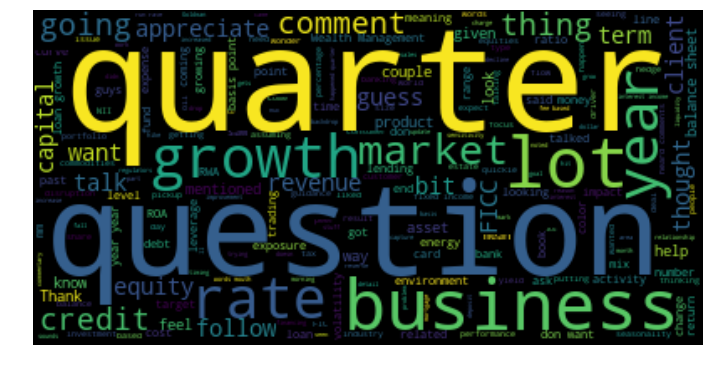

In [255]:
image = Image.open('/Users/luyin/Desktop/project/sample plot wordcloud.png')
display(image)

In [44]:
import pandas as pd
import numpy as np
import re

In [4]:
df = pd.read_excel('Q&A_Database_new.xlsx','QA', skiprows=3)
df.columns = ['id']+ list(df.columns[1:])
df.to_csv('QA2.csv')

In [64]:
year_col = df.Date.map(lambda x:x.to_pydatetime().year)
df2 = df.copy()
df2['year'] = year_col
df_year = df2.groupby('year')['Question'].apply(list)

In [70]:
df_year.values[0]

['The performance in equities was great, and you mentioned it’s pretty much across the board. Do you think there’s any seasonality, any one-time events, block trades, anything like that, that would lift such good performance in the quarter?',
 'You and others have been talking with your prime brokerage clients to help improve ROAs in the business. Is part of that flowing through in just better equity performance, more business with clients?',
 'In Jamie’s letter he talked about mentioning the need to push the new G-SIB rules to the product and the client level.\n\nAnd it piqued my curiosity. I’m just curious. How different is that from what you’ve already done? In other words, each step of the way you’ve been early in adopting and pushing out to the desk level higher capital charges. Does this just mean more of the same, meaning higher capital charge, higher capital charge, or is there something different there that you need to do?\n',
 'On net interest income, do you have an outlook f

In [72]:
year_list_new = []
for year_list in df_year.values:
    temp = [x.replace('\\', '') for x in year_list]
    temp = [x.replace('\n', '') for x in temp]
    year_list_new.append(temp)

In [73]:
year_list_new[0]

['The performance in equities was great, and you mentioned it’s pretty much across the board. Do you think there’s any seasonality, any one-time events, block trades, anything like that, that would lift such good performance in the quarter?',
 'You and others have been talking with your prime brokerage clients to help improve ROAs in the business. Is part of that flowing through in just better equity performance, more business with clients?',
 'In Jamie’s letter he talked about mentioning the need to push the new G-SIB rules to the product and the client level.And it piqued my curiosity. I’m just curious. How different is that from what you’ve already done? In other words, each step of the way you’ve been early in adopting and pushing out to the desk level higher capital charges. Does this just mean more of the same, meaning higher capital charge, higher capital charge, or is there something different there that you need to do?',
 'On net interest income, do you have an outlook for how

In [29]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

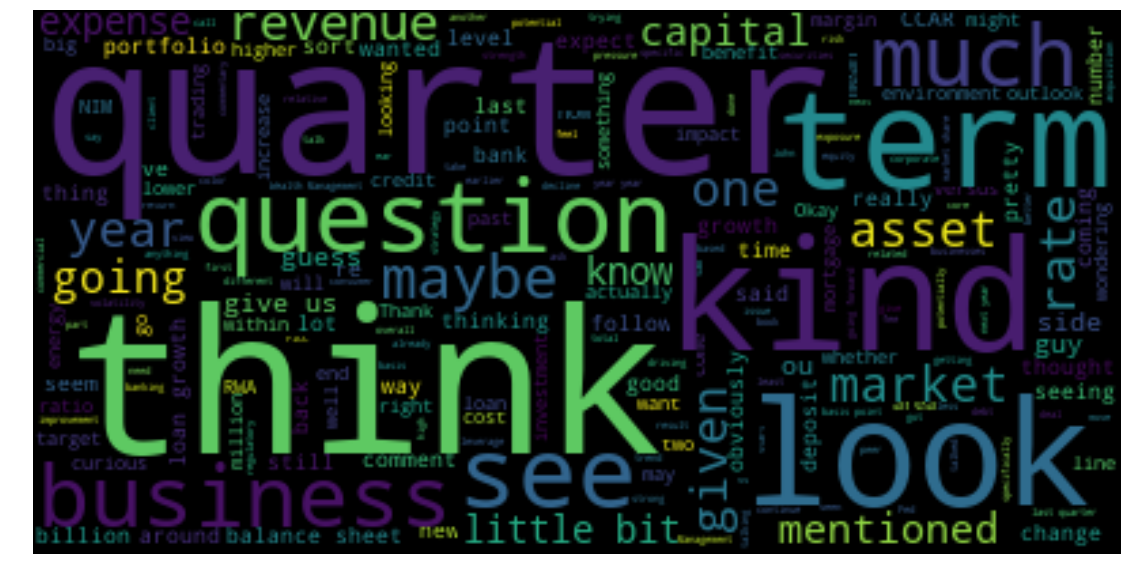

In [32]:
wordcloud = WordCloud().generate(df_year[2015])
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
#clean the text
import re
quest_list = [re.sub('[^a-z]',' ', x.lower()) for x in list(df.Question.values)]
quest_list2 = []
for sent in quest_list:
    quest_list2.append(' '.join(x.strip() for x in sent.split()))

In [21]:
quest_list2[0]

'the performance in equities was great and you mentioned it s pretty much across the board do you think there s any seasonality any one time events block trades anything like that that would lift such good performance in the quarter'

# Sentiment Analysis

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import nltk

In [28]:
sid = SentimentIntensityAnalyzer()
sentiment_list = []
for sentence in quest_list2:
    ss = sid.polarity_scores(sentence)
    sentiment_list.append(ss)

In [30]:
sentiment_list

[{'compound': 0.8689, 'neg': 0.058, 'neu': 0.685, 'pos': 0.256},
 {'compound': 0.8176, 'neg': 0.0, 'neu': 0.779, 'pos': 0.221},
 {'compound': 0.0772, 'neg': 0.023, 'neu': 0.94, 'pos': 0.037},
 {'compound': 0.8271, 'neg': 0.0, 'neu': 0.841, 'pos': 0.159},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.2667, 'neg': 0.019, 'neu': 0.937, 'pos': 0.044},
 {'compound': 0.7351, 'neg': 0.0, 'neu': 0.833, 'pos': 0.167},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.4588, 'neg': 0.0, 'neu': 0.913, 'pos': 0.087},
 {'compound': 0.8622, 'neg': 0.0, 'neu': 0.762, 'pos': 0.238},
 {'compound': 0.7906, 'neg': 0.0, 'neu': 0.894, 'pos': 0.106},
 {'compound': 0.9633, 'neg': 0.0, 'neu': 0.762, 'pos': 0.238},
 {'compound': 0.8074, 'neg': 0.04, 'neu': 0.777, 'pos': 0.183},
 {'compound': 0.7462, 'neg': 0.028, 'neu': 0.885, 'pos': 0.086},
 {'compound': 0.1935, 'neg': 0.125, 'neu': 0.732, 'pos': 0.143},
 {'compound': 0.503, 'neg': 0.014, 'neu': 0.935, 'pos': 0.0

In [31]:
ans_list = [re.sub('[^a-z]',' ', x.lower()) for x in list(df.Answer.values)]
ans_list2 = []
for sent in ans_list:
    ans_list2.append(' '.join(x.strip() for x in sent.split()))

In [32]:
sid = SentimentIntensityAnalyzer()
sentiment_list_ans = []
for sentence in ans_list2:
    ss = sid.polarity_scores(sentence)
    sentiment_list_ans.append(ss)

In [33]:
sentiment_list_ans

[{'compound': 0.9544, 'neg': 0.0, 'neu': 0.776, 'pos': 0.224},
 {'compound': 0.875, 'neg': 0.0, 'neu': 0.828, 'pos': 0.172},
 {'compound': 0.9541, 'neg': 0.025, 'neu': 0.878, 'pos': 0.096},
 {'compound': 0.9493, 'neg': 0.0, 'neu': 0.893, 'pos': 0.107},
 {'compound': 0.9817, 'neg': 0.017, 'neu': 0.854, 'pos': 0.129},
 {'compound': 0.3506, 'neg': 0.021, 'neu': 0.932, 'pos': 0.047},
 {'compound': 0.9271, 'neg': 0.0, 'neu': 0.802, 'pos': 0.198},
 {'compound': -0.296, 'neg': 0.031, 'neu': 0.969, 'pos': 0.0},
 {'compound': -0.3612, 'neg': 0.094, 'neu': 0.864, 'pos': 0.042},
 {'compound': 0.7861, 'neg': 0.0, 'neu': 0.788, 'pos': 0.212},
 {'compound': 0.3353, 'neg': 0.069, 'neu': 0.841, 'pos': 0.089},
 {'compound': 0.9619, 'neg': 0.024, 'neu': 0.81, 'pos': 0.166},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.5009, 'neg': 0.246, 'neu': 0.754, 'pos': 0.0},
 {'compound': 0.8889, 'neg': 0.028, 'neu': 0.878, 'pos': 0.095},
 {'compound': -0.1746, 'neg': 0.025, 'neu': 0.95

In [50]:
df_ans = pd.DataFrame(sentiment_list_ans)
df_ans.columns = ['compound_ans', 'neg_ans', 'neu_ans', 'pos_ans']

In [52]:
df_quest = pd.DataFrame(sentiment_list)
df_quest.columns = ['compound_quest', 'neg_quest', 'neu_quest', 'pos_quest']

In [54]:
df_sentitment = pd.concat([df, df_ans, df_quest], axis=1)

In [55]:
df_sentitment

,id,Company,Participants,Date,Event name,Event type,Analyst name,Analyst company,Question,Answer,...,Breakout,Earnings tag(s),compound_ans,neg_ans,neu_ans,pos_ans,compound_quest,neg_quest,neu_quest,pos_quest
0,1,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,"The performance in equities was great, and you...",There wasn’t anything particularly noteworthy ...,...,CIB,NaN,0.9544,0.000,0.776,0.224,0.8689,0.058,0.685,0.256
1,2,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,You and others have been talking with your pri...,"Yes, this is where it would be. I wouldn’t say...",...,CIB,NaN,0.8750,0.000,0.828,0.172,0.8176,0.000,0.779,0.221
2,3,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Glenn Schorr,Evercore ISI,In Jamie’s letter he talked about mentioning t...,"No, it is more of the same. Obviously, G-SIB t...",...,Capital,NaN,0.9541,0.025,0.878,0.096,0.0772,0.023,0.940,0.037
3,4,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,John McDonald,Sanford C. Bernstein & Co.,"On net interest income, do you have an outlook...","So again, assuming for a second that rates don...",...,Balance sheet,NaN,0.9493,0.000,0.893,0.107,0.8271,0.000,0.841,0.159
4,5,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Erika Najarian,Bank of America,"On CCAR, do you expect any potential surcharge...","Taking your first point, Erika, obviously, I d...",...,Capital,NaN,0.9817,0.017,0.854,0.129,0.0000,0.000,1.000,0.000
5,6,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Matthew O'Connor,Deutsche Bank,The drop in the adjusted expense is I think ab...,I think the best way to answer that is that we...,...,Expenses,Efficiencies,0.3506,0.021,0.932,0.047,0.2667,0.019,0.937,0.044
6,7,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Matthew O'Connor,Deutsche Bank,A big company out there announced it’s exiting...,"So look, the most important thing obviously in...",...,CB,NaN,0.9271,0.000,0.802,0.198,0.7351,0.000,0.833,0.167
7,8,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Chris Spahr,CLSA Americas,On your CET1 ratio guidance. Do you give any k...,"No, we haven’t given any specific guidance, Ch...",...,Capital,NaN,-0.2960,0.031,0.969,0.000,0.0000,0.000,1.000,0.000
8,9,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Gerard Cassidy,RBC Capital Markets,You mentioned that Treasury Service revenues w...,There are a couple of different things. One wa...,...,CIB,NaN,-0.3612,0.094,0.864,0.042,0.4588,0.000,0.913,0.087
9,10,JPMorgan Chase,"Jamie Dimon, Marianne Lake",2015-04-14,1Q15 earnings call,Earnings call,Gerard Cassidy,RBC Capital Markets,You mentioned that you have a very strong advi...,"Not specifically, no. I will tell you that whi...",...,CIB,NaN,0.7861,0.000,0.788,0.212,0.8622,0.000,0.762,0.238


In [56]:
# df_sentitment.to_csv('add_sentiment.csv')

In [57]:
df_sentitment.neg_ans.corr(df_sentitment.neg_quest)

0.18375216919729936

In [58]:
df_sentitment.pos_ans.corr(df_sentitment.pos_quest)

0.14862167831783477

In [59]:
df_sentitment.neu_ans.corr(df_sentitment.neu_quest)

0.15270273473680104

In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [74]:
analyzer = SentimentIntensityAnalyzer()
sentiment_year = []
for year_lst in year_list_new:
    temp1 = []
    for sentence in year_lst:
        vs = analyzer.polarity_scores(sentence)
        temp1.append((sentence, vs))
    sentiment_year.append(temp1)

In [75]:
sentiment_year

[[('The performance in equities was great, and you mentioned it’s pretty much across the board. Do you think there’s any seasonality, any one-time events, block trades, anything like that, that would lift such good performance in the quarter?',
   {'compound': 0.8689, 'neg': 0.06, 'neu': 0.679, 'pos': 0.261}),
  ('You and others have been talking with your prime brokerage clients to help improve ROAs in the business. Is part of that flowing through in just better equity performance, more business with clients?',
   {'compound': 0.8176, 'neg': 0.0, 'neu': 0.779, 'pos': 0.221}),
  ('In Jamie’s letter he talked about mentioning the need to push the new G-SIB rules to the product and the client level.And it piqued my curiosity. I’m just curious. How different is that from what you’ve already done? In other words, each step of the way you’ve been early in adopting and pushing out to the desk level higher capital charges. Does this just mean more of the same, meaning higher capital charge, h

In [81]:
len(df_year.values[0])

683

In [83]:
df_year2015 = pd.DataFrame(sentiment_year[0])
df_year2016 = pd.DataFrame(sentiment_year[1])
df_year2017 = pd.DataFrame(sentiment_year[2])
df_year2018 = pd.DataFrame(sentiment_year[3])

In [84]:
df_year2015.to_csv('vd_sentiment_year_2015', mode = 'a')
df_year2016.to_csv('vd_sentiment_year_2016', mode = 'a')
df_year2017.to_csv('vd_sentiment_year_2017', mode = 'a')
df_year2018.to_csv('vd_sentiment_year_2018', mode = 'a')

In [85]:
df_year2015

,0,1
0,"The performance in equities was great, and you...","{'neg': 0.06, 'neu': 0.679, 'pos': 0.261, 'com..."
1,You and others have been talking with your pri...,"{'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'comp..."
2,In Jamie’s letter he talked about mentioning t...,"{'neg': 0.023, 'neu': 0.935, 'pos': 0.042, 'co..."
3,"On net interest income, do you have an outlook...","{'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'comp..."
4,"On CCAR, do you expect any potential surcharge...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,The drop in the adjusted expense is I think ab...,"{'neg': 0.02, 'neu': 0.935, 'pos': 0.046, 'com..."
6,A big company out there announced it’s exiting...,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp..."
7,On your CET1 ratio guidance. Do you give any k...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,You mentioned that Treasury Service revenues w...,"{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'comp..."
9,You mentioned that you have a very strong advi...,"{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'comp..."
